# Machine Learning

## 모델 기반 학습

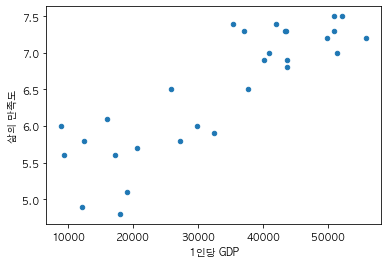

[[5.96242338]]


In [4]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import sklearn.linear_model

#한글 출력을 위한 설정
%matplotlib inline
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

#OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita) 데이터를 합쳐주는 함수
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


# 데이터 적재
oecd_bli = pd.read_csv("./data/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("./data/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# 데이터 시각화
ax = country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
ax.set(xlabel="1인당 GDP", ylabel="삶의 만족도")
plt.show()

# 선형 모델 선택
model = sklearn.linear_model.LinearRegression()

# 모델 훈련
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 결과 [[ 5.96242338]]

## 사례 기반 학습

In [5]:
import sklearn.neighbors

# 선형 회귀 모델을 k-최근접 이웃 회귀 모델로 교체할 경우
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# 모델 훈련
knn.fit(X, y)

# 키프로스에 대한 예측
print(knn.predict(X_new)) # 결과 [[ 5.76666667]]

[[5.76666667]]
